# Notebook 26: Tractions on plane

In this notebook we will look at the problem of calculating the magnitude and orientation of the normal and maximum shear tractions on a plane. This problem is crucial to any question involving faulting and fracturing in the upper crust.

The stereonet below illustrates the problem:

<img src="../figures/tractions_on_plane.png" alt="tractions_on_plane" width="350" style="display: block; margin: 0 auto"/><br><br>

We want to determine the normal and maximum shear tractions on a plane of any orientation, under a stress tensor with principal axes of any orientation. There are three coordinate systems involved: 1. The geographic coordinate system $\mathbf{NED}$ (north-east-down) where the data are input and the results are output, 2. The principal stress coordinate system which is defined by the orientation of the principal stresses $\sigma_1$, $\sigma_2$ and $\sigma_3$, and 3. A coordinate system defined by the fault plane, with the pole to the plane, $\mathbf{p}$, as the first axis, the line of zero shear traction on the fault plane, $\mathbf{b}$, as the second axis, and the line of maximum shear traction on the fault plane, $\mathbf{s}$, as the third axis.

The solution to this problem is explained in Allmendinger et al. (2012; section 6.5) and also in our [Computational Geosciences Resource](https://github.com/nfcd/compGeo) (section 7.4.1). We don't include it here.

## Python function:

The function [shear_on_plane](../functions/shear_on_plane.py) computes the normal and shear tractions on a plane of any orientation, and under a stress of any orientation. The function also computes an important parameter called the principal stress ratio, $R$ (Gephart, 1990):

$$
R=\frac{\left(\sigma_2-\sigma_1\right)}{\left(\sigma_3-\sigma_1\right)}
$$

This ratio is of key importance for predicting faulting and fracturing in the crust.

## Application

Let's look at the influence of the principal stress ratio, $R$, for the case illustrated in the stereonet above. $\sigma_1 = 50$ MPa and $\sigma_3 = 10$ MPa, and let´s vary the value of $\sigma_2$ between that of $\sigma_3$ ($R = 1$) and $\sigma_1$ ($R = 0$).

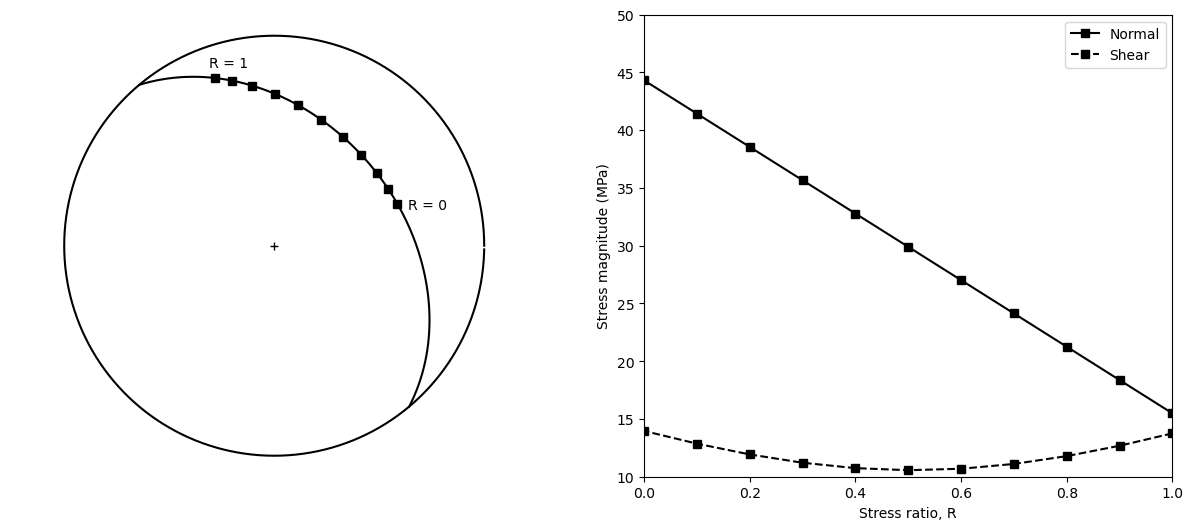

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import functions shear_on_plane, great_circle
# and st_coord_line
from shear_on_plane import shear_on_plane
from great_circle import great_circle
from st_coord_line import st_coord_line
# import class Circle
from Circle import Circle

# principal stress coordinate system
# start with R = 1, sigma2 = sigma3
stress = np.array([[50 , 0 , 0] ,[ 0 , 10 , 0] ,[ 0 , 0 , 10]])

# trend and plunge of sigma1, and trend of sigma3
tx1, px1, tx3 = np.radians([325, 33, 66])

# plane orientation
stk, dip = np.radians([320, 40])

# number of R increments
rinc = 11

# sigma2 increment
sstep = (stress[0,0] - stress[2,2])/(rinc-1)

# initialize arrays
nort = np.zeros(rinc) # normal tractions
sht = np.zeros(rinc) # max. shear traction
tsht = np.zeros(rinc) # trend max. shear traction
psht = np.zeros(rinc) # plunge max. shear traction
rval = np.zeros(rinc) # R value

# compute normal and shear tractions for all R values
for i in range(rinc):
    stress[1,1] = stress[2,2] + sstep*i
    # compute normal and maximum shear tractions on plane
    tt,dctt,srat = shear_on_plane(stress,tx1,px1,
                                  tx3,stk,dip)
    # store values
    nort[i] = tt[0,0]
    sht[i] = tt[2,0]
    tsht[i] = tt[2,1]
    psht[i] = tt[2,2]
    rval[i] = srat

# make two plots side by side
fig, ax = plt.subplots(1,2,figsize=(15,6))
    
# plot lower hemisphere, equal area stereonet
circle = Circle([0,0], 1)
x, y = circle.coordinates()
# plot primitive circle
ax[0].plot(x,y,"k")
# plot center of circle
ax[0].plot(0,0,"k+")
# make axes equal and remove them
ax[0].axis("equal")
ax[0].axis("off")
# plot fault plane
path = great_circle(stk,dip,1)
ax[0].plot(path[:,0], path[:,1], "k") 
# plot max. shear tractions orientations 
for i in range(rinc):
    x, y = st_coord_line(tsht[i],psht[i],1)
    ax[0].plot(x,y,"ks")
    if i == 0:
        ax[0].text(x-0.025, y+0.05, "R = 1")
    if i == rinc-1:
        ax[0].text(x+0.05, y-0.025, "R = 0")
    
# plot normal and shear tractions versus R
ax[1].plot(rval,nort,"k-s", label="Normal")
ax[1].plot(rval,sht,"k--s", label="Shear")
ax[1].axis([0, 1, 10, 50])
ax[1].set_xlabel("Stress ratio, R")
ax[1].set_ylabel("Stress magnitude (MPa)")
ax[1].legend()

plt.show()

This is figure 6.9 of Allmendinger et al. (2012). It shows how the orientation and magnitude of the shear traction on the plane varies with the stress ratio $R$. Notice that $R = 0.5$ gives the lowest shear traction.

Is this important? Well, yes. It turns out that $\sigma_2$ is the least known principal stress component. In a normal faulting regime, for example, $\sigma_1$ is equal to the lithostatic stress, while $\sigma_3$ can be determined from leak-off tests (the pressure needed to generate hydraulic fractures is equal to $\sigma_3$). The value of $\sigma_2$ is more uncertain. [Morris and Ferrill (2009)](https://www.sciencedirect.com/science/article/pii/S0191814108000692) wrote a nice paper about this.